## Task list:
### 1- Finish python code:
### 1.1 - mission profile and historical mission profiles (thrust energy) and thrust to weight and total thrust energy
### 1.2 - batteries and esc and more motors
### 1.3 - weights
### 1.4 - check slides and assignment paper (make sure everything is accounted for)
### 2- check javaprop and gold m
### 3 - Prof. Goppert's code gave the ideal properties for motors
### 4 - maybe using optimization algorithms is better
### 5 - manufacturing vs test

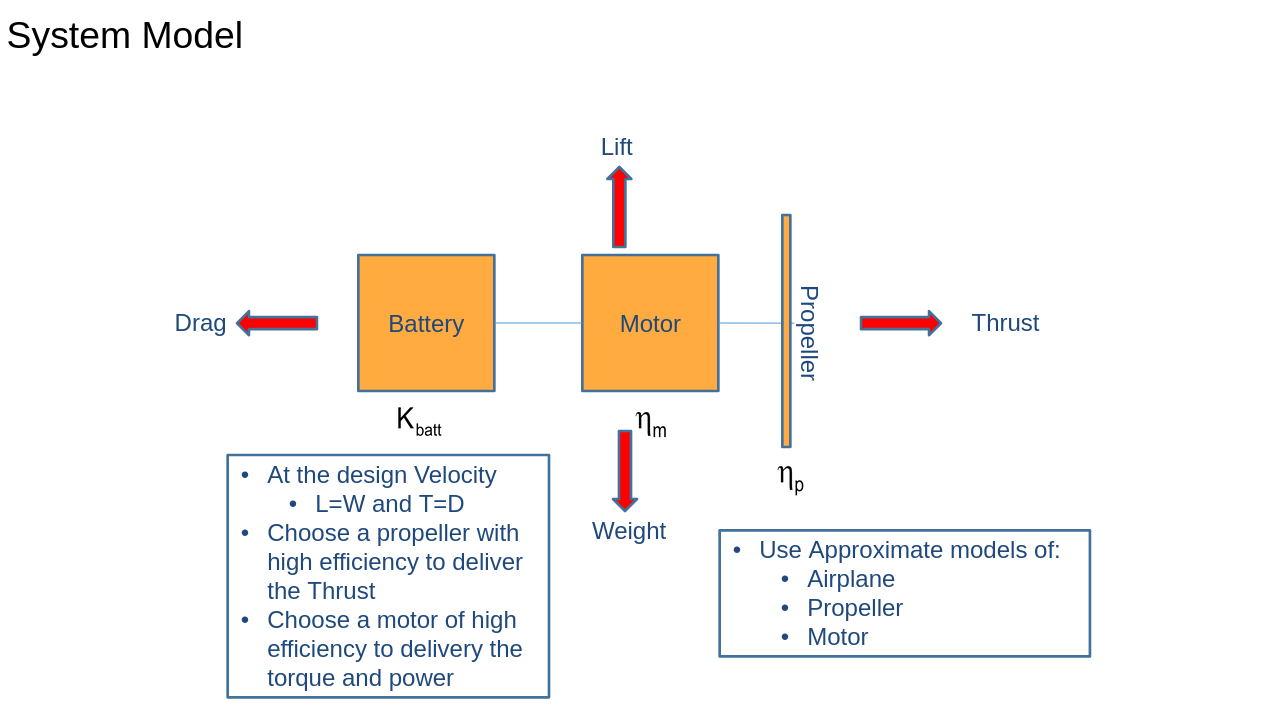

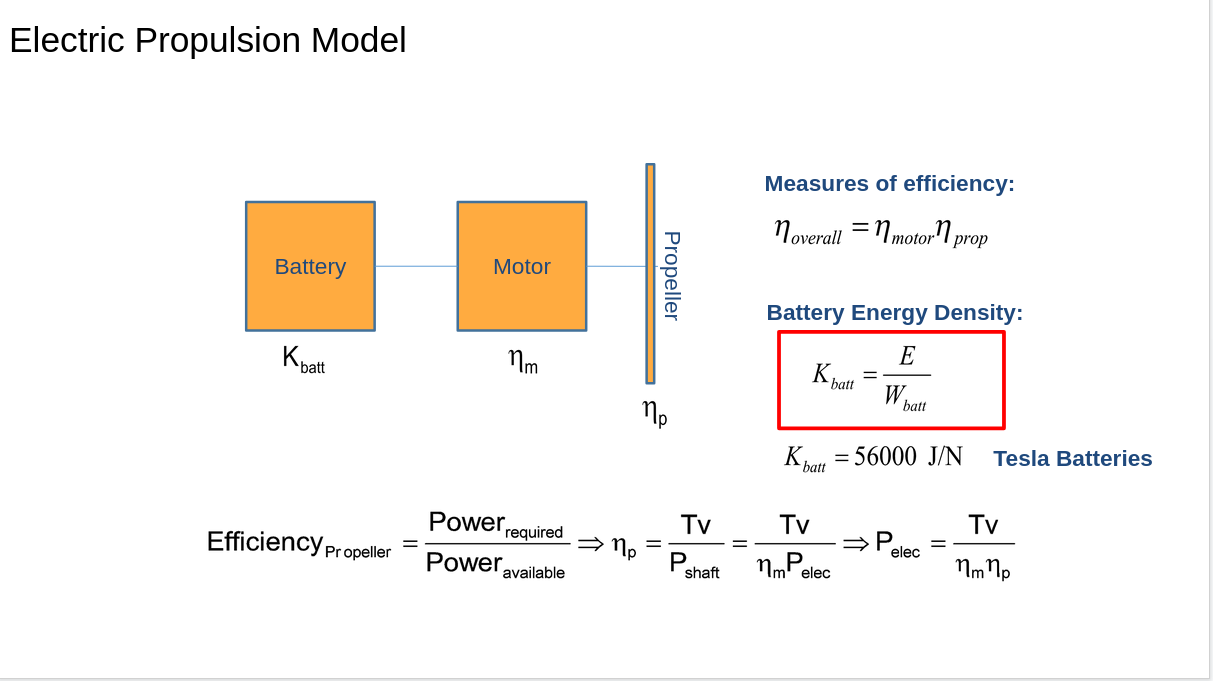

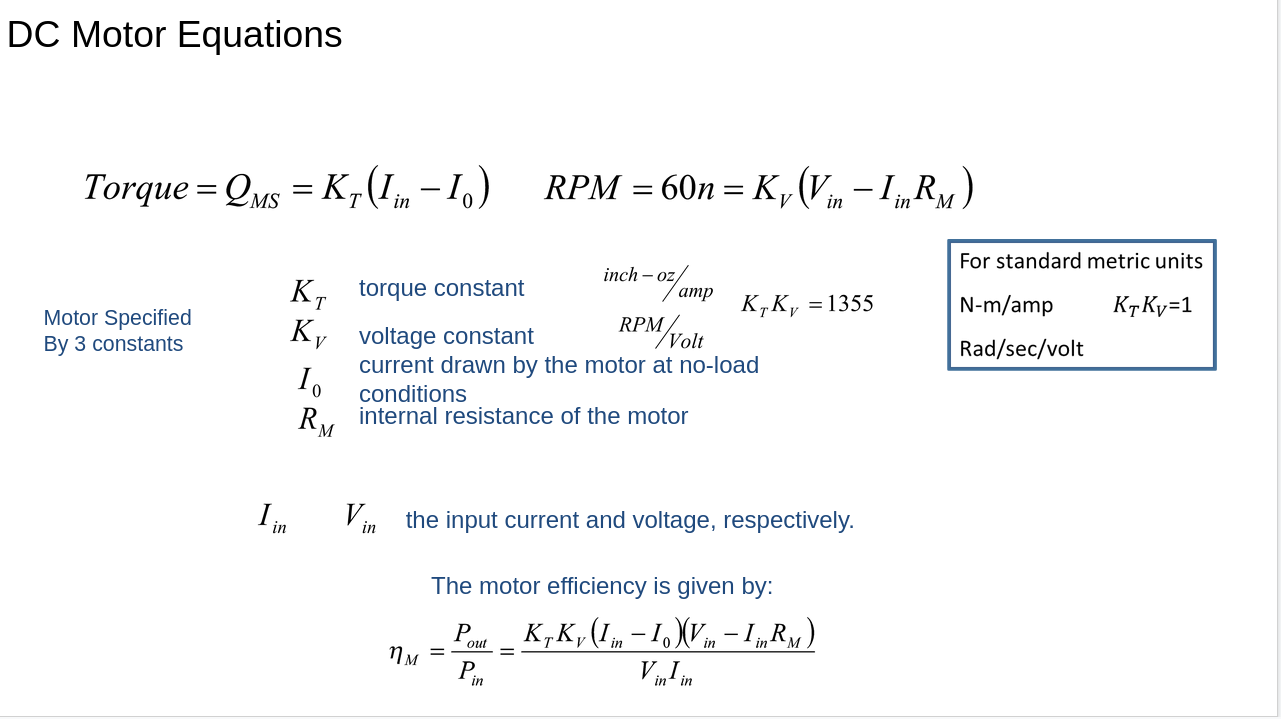

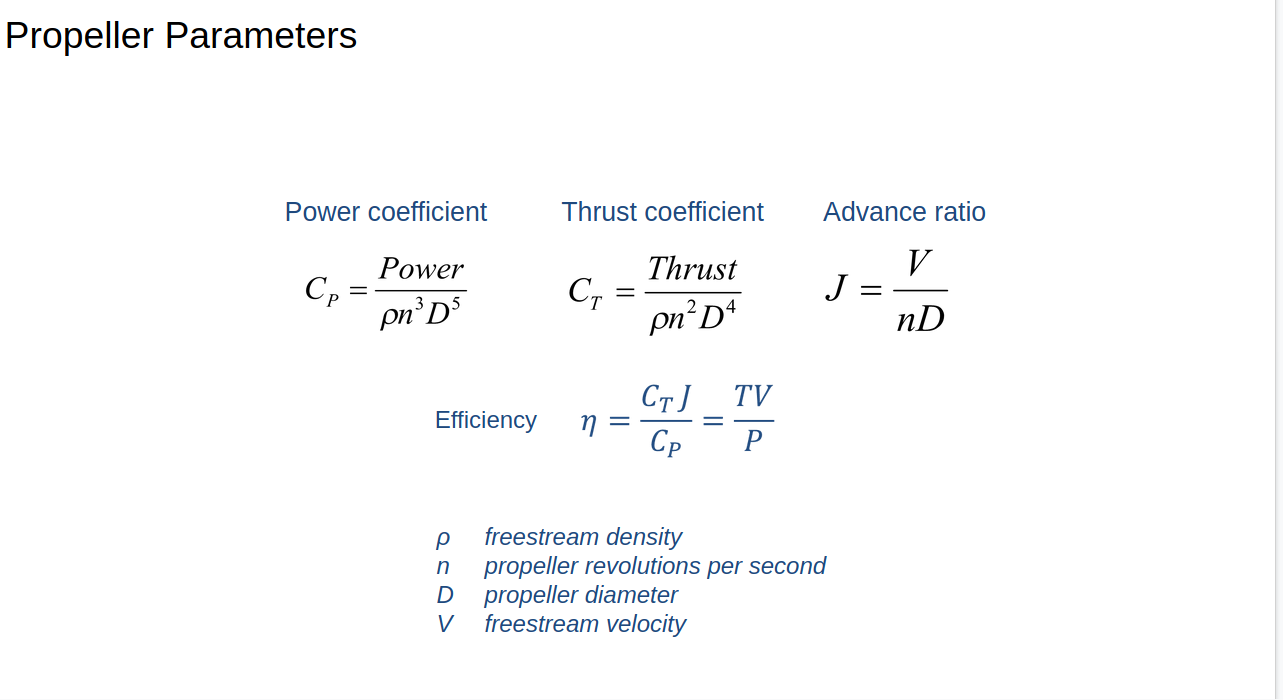

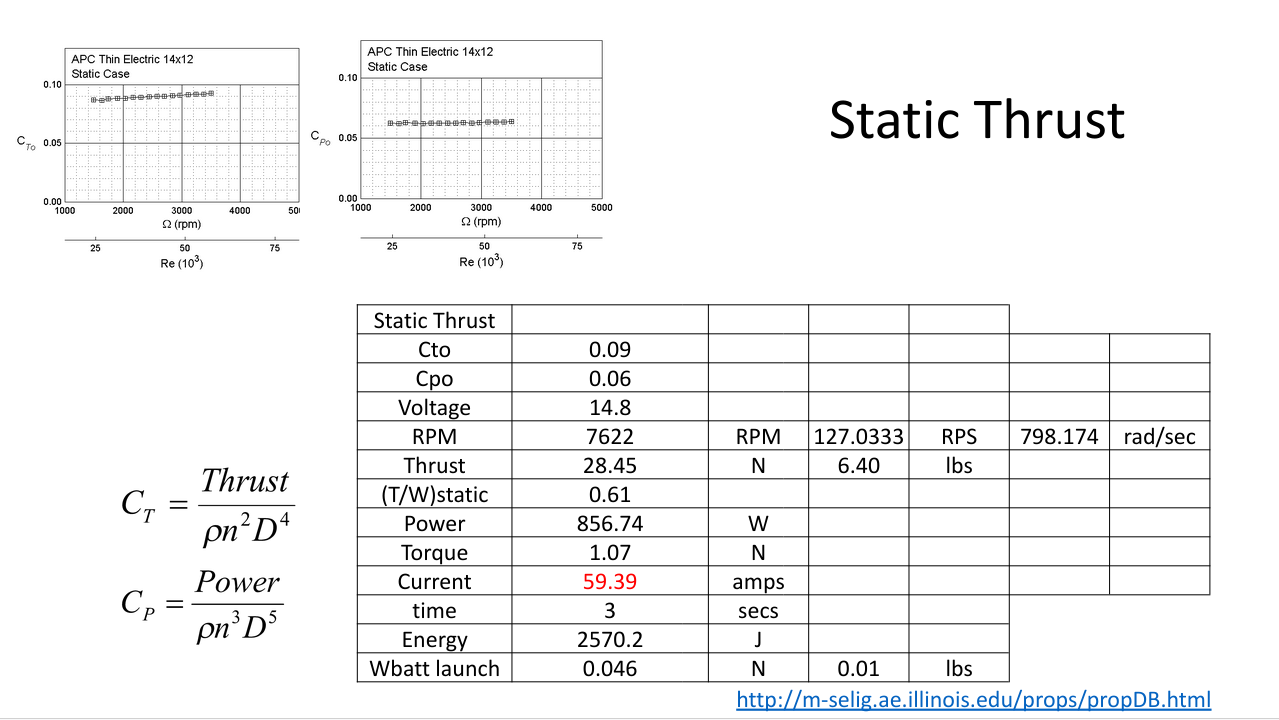

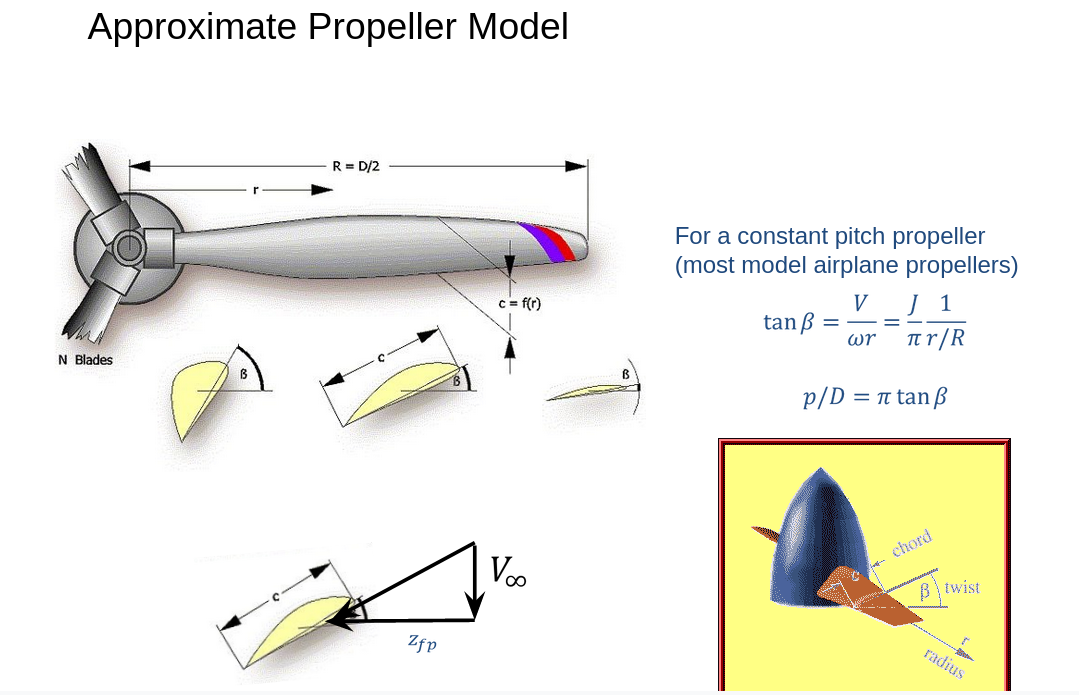

In [14]:
from IPython.display import Image, IFrame, Math

dc_motor_eq = Image(filename='propstuff/dcmotorequations.png')
propparam = Image(filename='propstuff/propparam.png')
static_thrust = Image(filename='propstuff/staticthrust.png')
system_model = Image(filename='propstuff/systemmodel.png')
approx_prop_model = Image(filename='propstuff/approxpropmodel.png')
electric_prop_model = Image(filename='propstuff/Electric Propulsion Model.png')
images = [system_model, electric_prop_model, dc_motor_eq, propparam, static_thrust, approx_prop_model]

for image in images:
    display(image)


In [15]:
import pandas as pd

data = pd.read_excel('propstuff/dbt_inventory.xlsx', sheet_name='Motor')
data.head(26) # -1 for max?


,Line,Quantity,Brand,Model,Color,KV [RPM/V],Resistance [Ohms],No load current at 10 V [A],LiPo Cells min [#],Min Voltage [V],...,Power Diff [%],Can Diameter [mm],Bullet connector diameter [mm],Notes,efficiency,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1,1.0,NTM,42-58,Black/silver,500.0,0.14400,1.60,5.0,18.5,...,0.356923,42.0,4,NaN,NaN,With the idea that KvKt = 1,NaN,NaN,NaN,NaN
1,2,1.0,Hacker,A30-14M,Purple/black,3600.0,0.19000,3.10,3.0,11.1,...,1.352000,35.0,Bare,6.7:1 Gearbox att.,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Axi,5320/18,Gold/Orange,370.0,0.23000,1.40,6.0,22.2,...,0.135135,63.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Sunnysky,X3525-7,Black/Black,520.0,0.02200,1.30,6.0,22.2,...,0.331387,42.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.0,E-flite,Power 46,Blue/Black/Silver,670.0,0.04000,3.90,4.0,14.8,...,0.443750,50.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2.0,Turnigy,Aerodrive 3542,Silver/Silver,1250.0,0.02200,NaN,3.0,11.1,...,0.201589,37.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.0,Greatplane Rimfire,1.60 63-62-250,Black/Gold,250.0,NaN,1.50,9.0,33.3,...,-0.092800,63.0,Bare,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1.0,T motor,MN4010-11,Black/Silver,475.0,0.09800,0.80,4.0,14.8,...,1.240000,40.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2.0,Scorpion,S-2215-18,Black/Orange,1126.0,0.07800,0.73,3.0,11.1,...,0.400000,27.9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1.0,Turnigy,Aerodrive 3548,Silver/Silver,1050.0,0.01600,NaN,3.0,11.1,...,0.024390,37.0,Bare,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## From MIT

In [16]:
IFrame('propstuff/motorprop.pdf', width = 1000, height = 1000)

$cd = 0.058$
$rho = 1.225$
$vel = 8 m/s$
$A = 0.38 m^2$

In [ ]:
%%capture 
## hiding output (graphs)
%run prop_match.py
## !!! Put proper values below
desired_thrust = (0.5)*(1.225)*(8**2)*(0.38)*(0.058)
print(out(thrust = 0.1))

## using historical data and interpolation?
##NOTE this appends propeller name, max eff, rpm at max eff, T and Q (torque) to an excel file 'efficiency.xlsx'

$\text{Parameters we need to set are the velocity (at what speed will our aircraft go?), thrust required for the mission, and motor applied voltage.}$

## Motors

In [ ]:
eta_m = lambda kv, R, i0, v: (1 - (i0*R)/(v - omega / kv))*(omega / (v*kv))
Q_m = lambda kv, R, i0, v: ((v - (omega / kv)) * (1 / R) - i0) * (1 / kv)
Pshaft = lambda kv, R, i0, v: ((v - (omega / kv)) * (1 / R) - i0) * (omega / kv)

$$\eta_m(\Omega, v) = [1 + \frac{i_0 R}{\frac{\Omega}{K_v} - v}]\frac{\Omega}{v K_v}$$
$$$$
$$Q_m(\Omega, v) = [(v - \frac{\Omega}{K_v})\frac{1}{R} - i_0](\frac{1}{K_v}) $$
$$$$
$$P_{\text{shaft}}(\Omega, v) = [(v - \frac{\Omega}{K_v})\frac{1}{R} - i_0](\frac{\Omega}{K_v})$$
### When $\ \eta_m = 0$:
$$\Omega = K_v(v - i_0R)$$

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

num = 26 ## number of entries in the excel file
motor_names = np.array(data['Model'])[0:num]
lines = np.array([i for i in range(num)])
kv = np.array(data['KV [RPM/V]'])[0:num] / 60 # equation requires rad/s/volt
R = np.array(data['Resistance [Ohms]'])[0:num]
i0 = np.array(data['No load current at 10 V [A]'])[0:num]
#v = np.random.randint(high= 11, low= 8, size=3, replace=False)
v = [5,7,10] ##check battery voltages

rgb = ['blue', 'red', 'black']

functions = {'eta': eta_m, 'Q': Q_m, 'Pshaft': Pshaft}

for line in lines[0:2]: ## to keep it brief for now!!!
    if kv[line] is str:
        pass
    elif R[line] is str:
        pass
    elif i0[line] is str:
        pass
    else:
        for fun in functions:
            plt.figure(figsize=(8,8))
            plt.title(motor_names[line])
            for j in range(len(v)):
                omega = np.linspace(0, kv[line]*(v[j] - i0[line]*R[line]), 100)

                func = np.array(functions[fun](kv = kv[line], R=R[line], i0=i0[line], v=v[j]))

                plt.plot(omega, func, color=rgb[j], label= 'v = ' + str(v[j]))
                plt.xlabel('rps')
                plt.ylabel(fun)
                if fun == 'eta':
                    eta_max = np.nanmax(func)
                    rps_max = omega[np.where(func == eta_max)][0]
                    plt.text(rps_max, np.nanmax(func), \
                            'omega = {:.2f}'.format(rps_max) + '\n' + 'eta = {:.2f}'.format(eta_max))
            plt.legend()
        

## Propellers

$\text{We can determined voltage from required thrust:}$
$$$$
$$ (1)\text{ Terrible model: }\ T = C_T \rho n^2 D^4 \qquad (2) \text{ Or: } T = \frac{1}{2} \rho (\Omega r)^2 \pi r^2 C_T = \frac{1}{2} \rho V^2 \pi r^2 \frac{C_T(\lambda, Re)}{\lambda^2}$$

### $\text{From aerodynamics T = 4 N, and a D = 5 in.}$

In [ ]:
T = lambda rho, R, Ct: (0.5)*(rho)*((omega*R)**2)*(np.pi)*(R**2)*(Ct)

$\text{Use:} \quad v(\Omega, Q) = (K_vQ + i_0)R + \frac{\Omega}{K_v} \quad \text{to find required voltage. Another method is graphical and detailed in the document above.}$

In [8]:
##
num_prop = 30 # how many propellers?
eff = pd.read_excel('propstuff/efficiency.xlsx')
eff.head(num_prop) # -1 for max?

,prop_name,max_eta_prop,omega,T,Q,diameter [in]
0,apce_9x4.5,0.606004,4694.755756,0.694805,0.018667,9.0
1,apce_11x10,0.754006,2523.018018,0.916901,0.036767,11.0
2,mae_10x7,0.713008,2828.262262,0.677846,0.025676,10.0
3,grsn_11x6,0.609627,3789.031031,1.033626,0.034121,11.0
4,gwssf_9x7,0.722124,3623.898899,0.736453,0.021495,9.0
5,apce_8x6,0.671860,4444.555556,1.003827,0.025653,8.0
6,grcp_11x8,0.733296,2477.981982,0.514342,0.021624,11.0
7,magf_9x7,0.720388,3318.654655,0.557123,0.017800,9.0
8,apcsp_11x4,0.488031,4809.847848,1.601527,0.052111,11.0
9,apcsf_11x7,0.718659,2918.334334,1.056474,0.038454,11.0


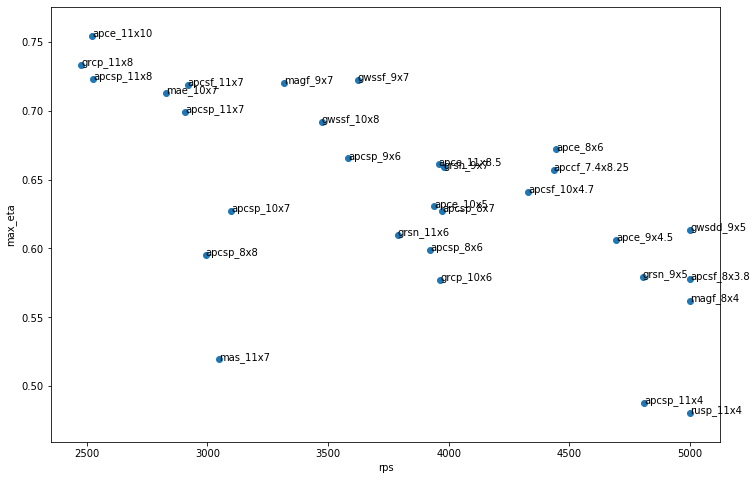

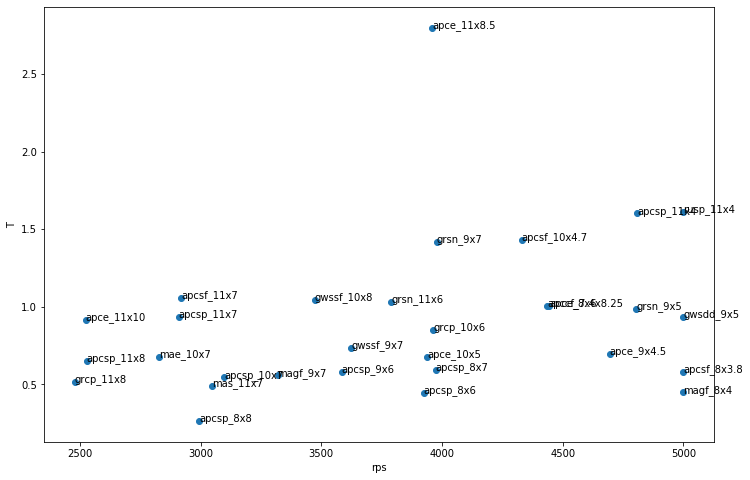

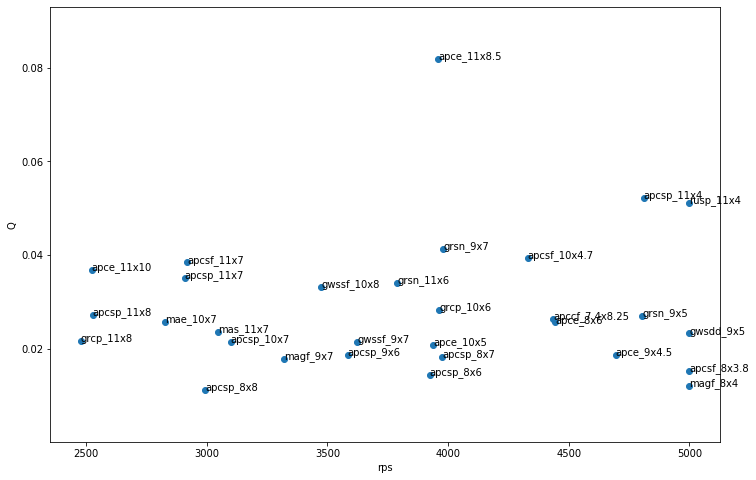

In [9]:
names = eff['prop_name'][0:num_prop]
omegas = eff['omega'][0:num_prop]
max_eta = eff['max_eta_prop'][0:num_prop]
T = eff['T'][0:num_prop]
Q = eff['Q'][0:num_prop]
quantities = {'max_eta':max_eta, 'T': T, 'Q': Q}

for quantity in quantities:
    plt.figure(figsize=(12,8))
    plt.scatter(omegas, quantities[quantity])
    plt.xlabel('rps')
    plt.ylabel(quantity)
    for i, txt in enumerate(names):
        plt.annotate(txt, (omegas[i], quantities[quantity][i]))


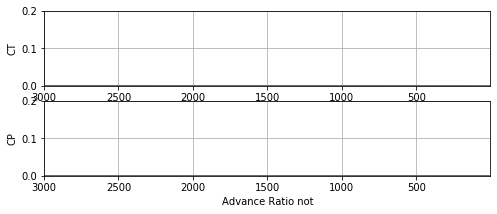

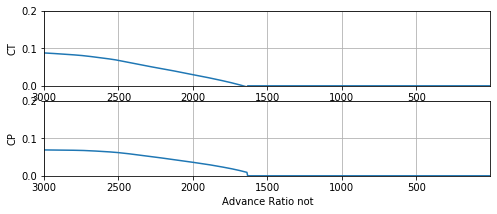

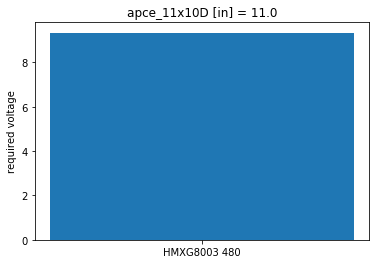

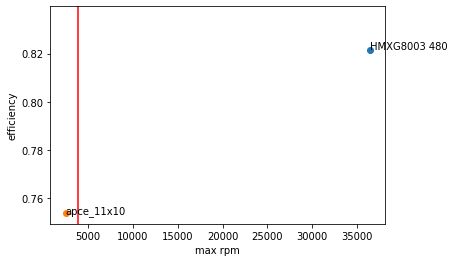

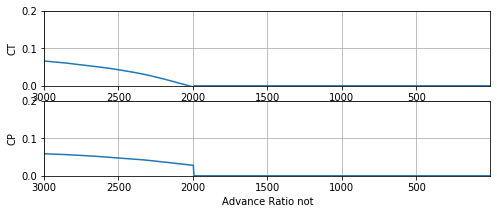

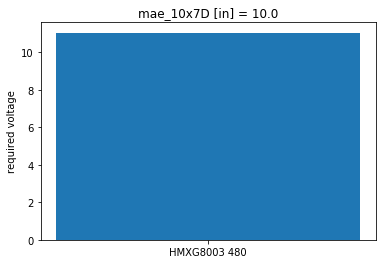

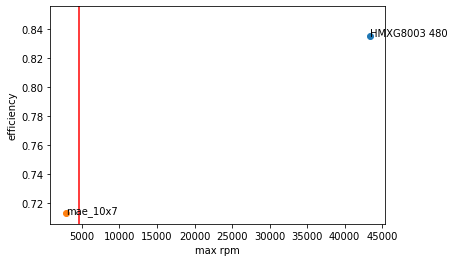

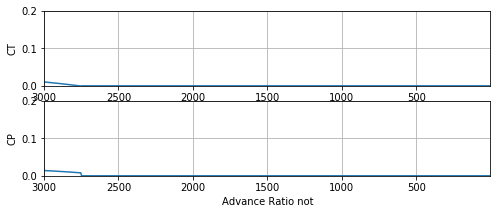

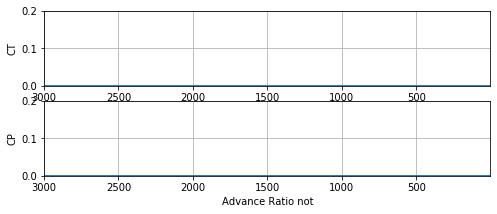

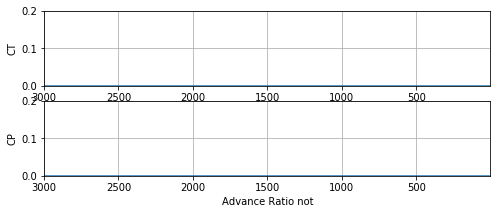

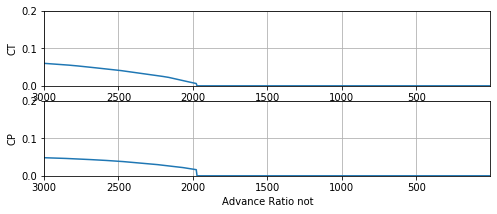

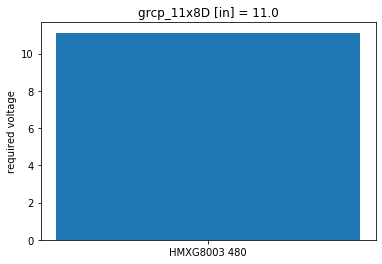

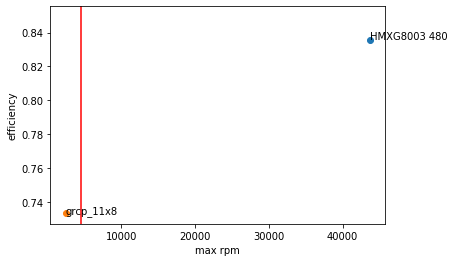

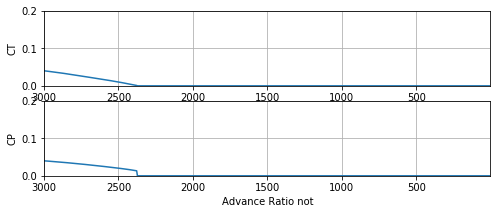

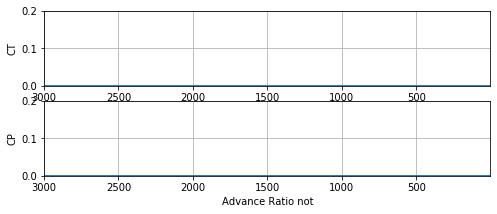

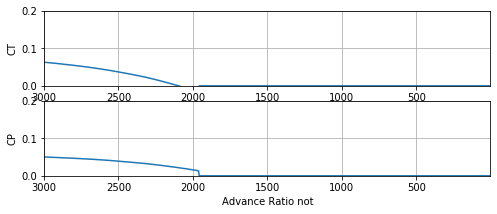

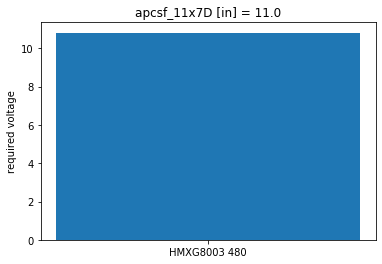

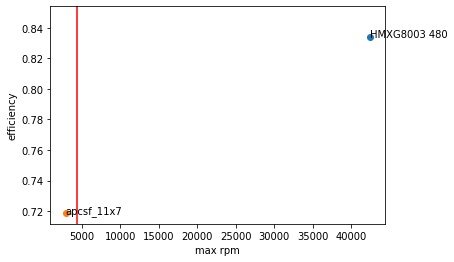

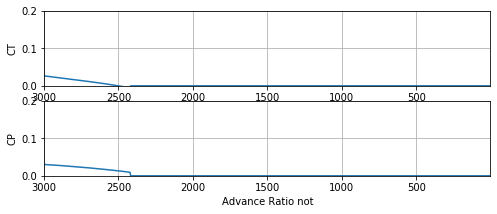

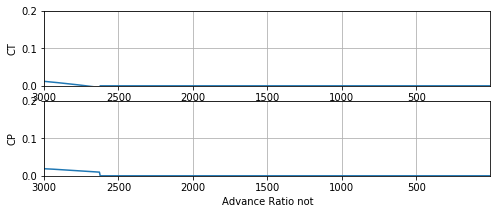

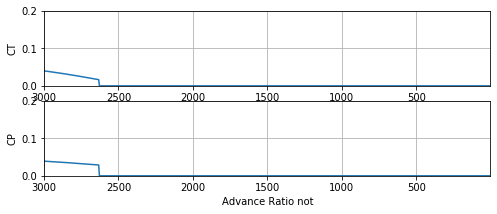

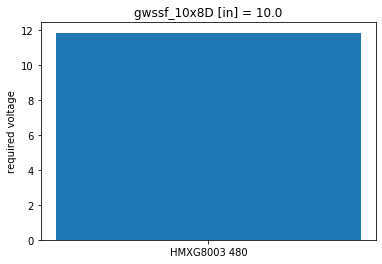

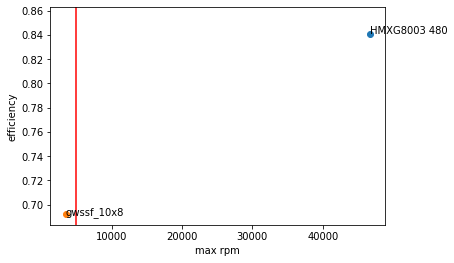

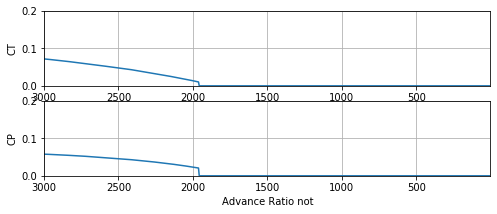

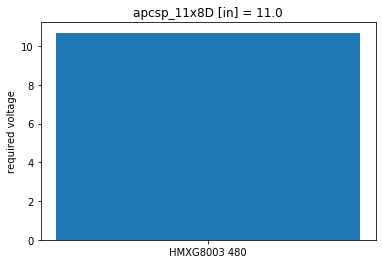

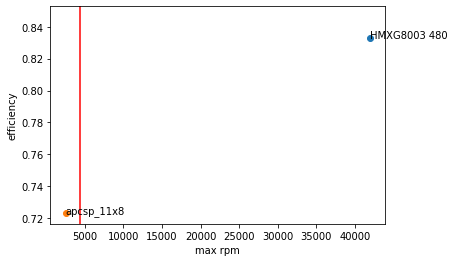

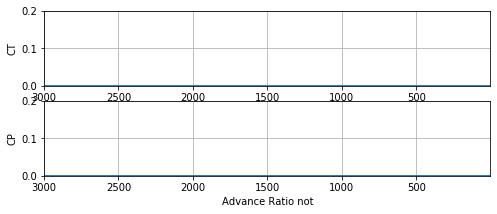

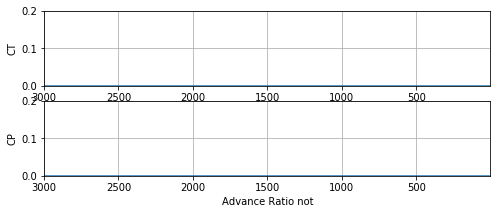

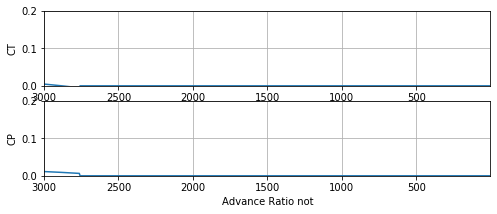

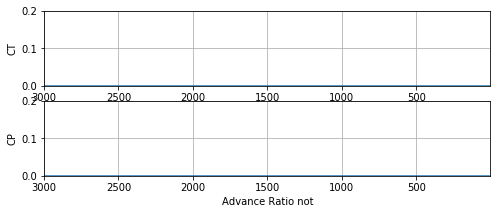

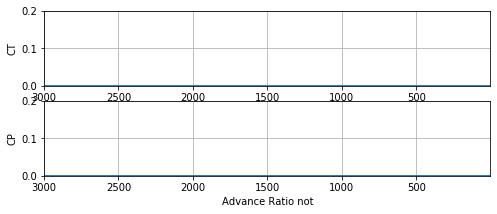

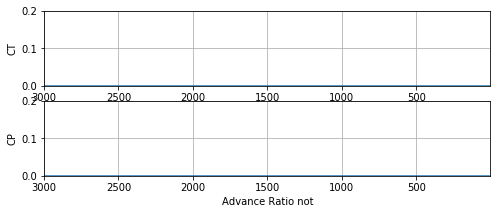

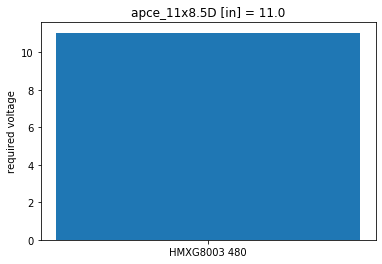

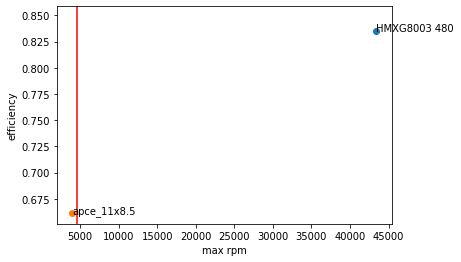

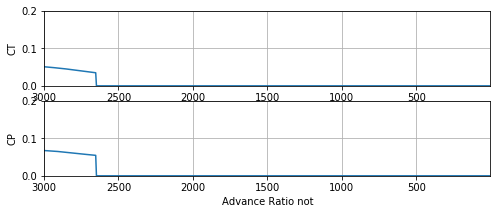

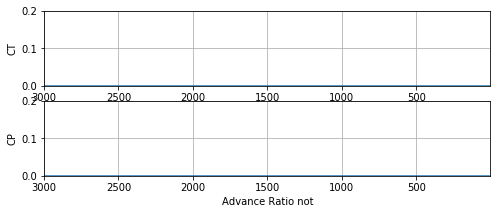

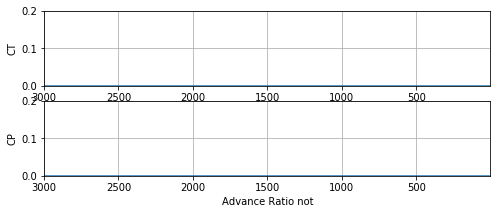

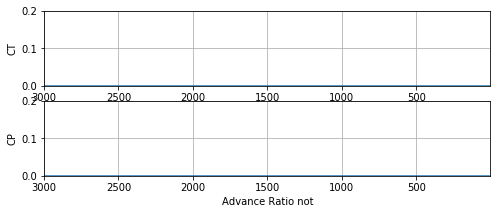

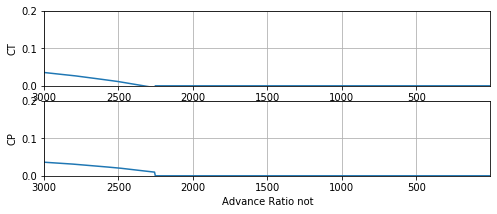

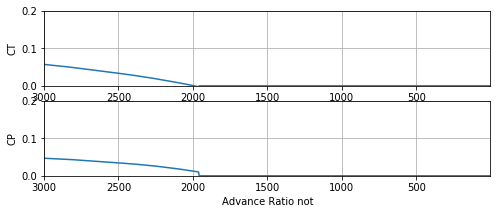

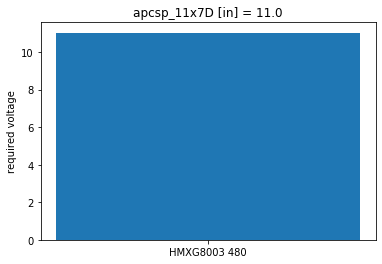

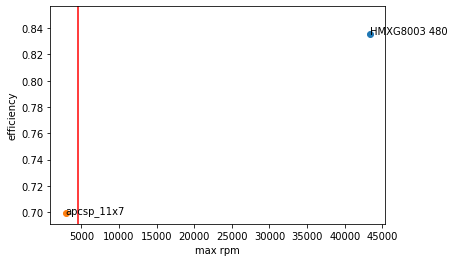

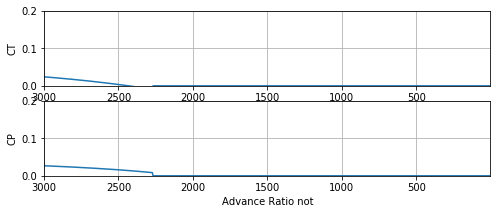

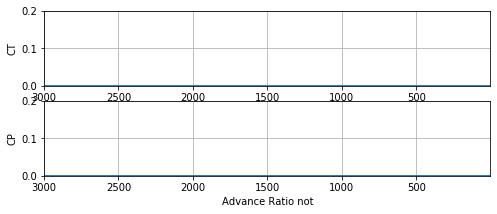

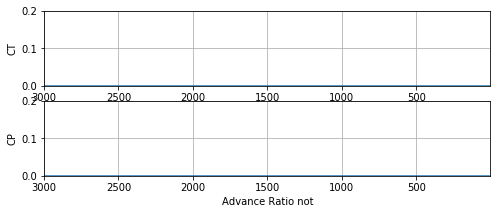

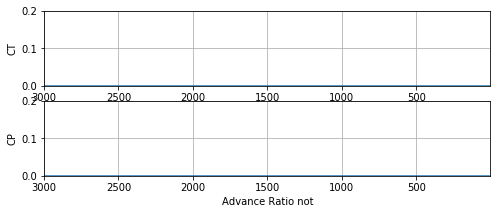

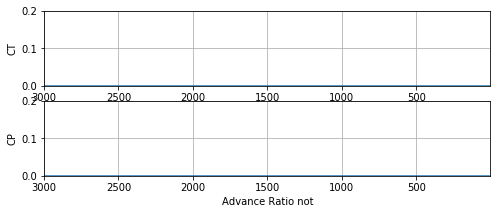

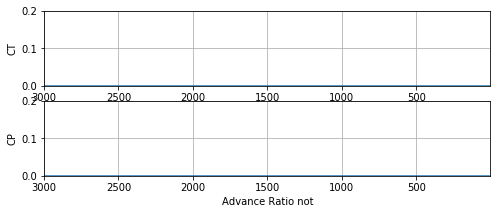

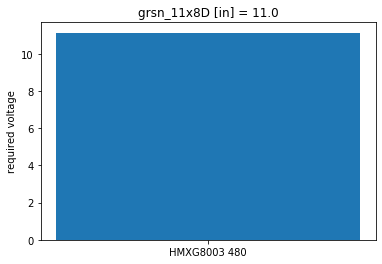

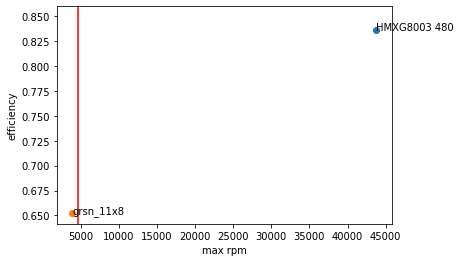

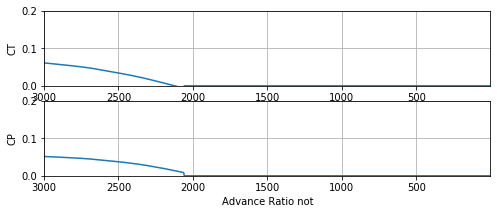

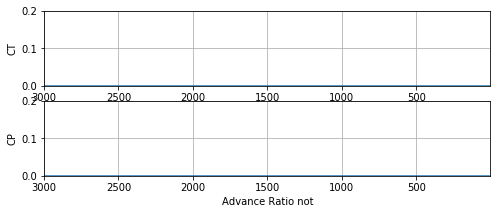

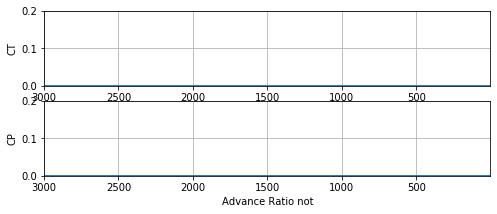

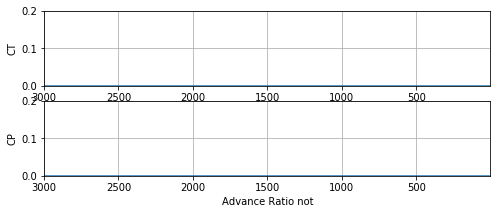

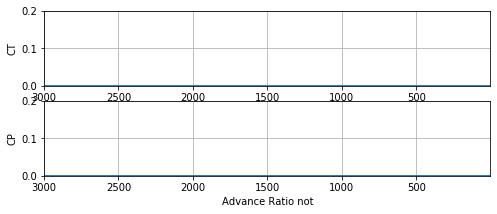

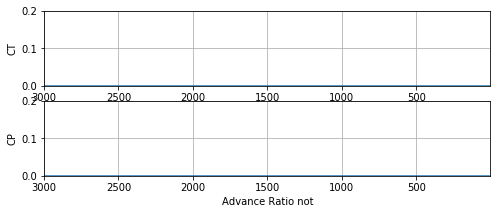

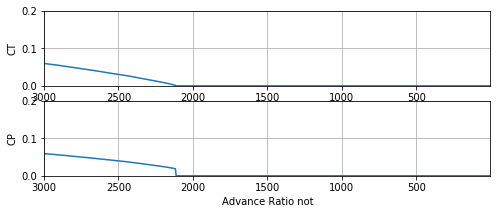

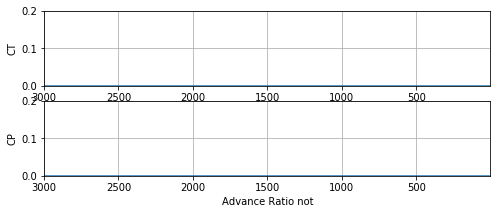

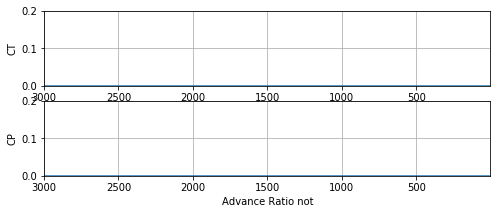

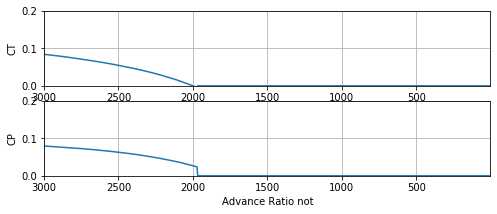

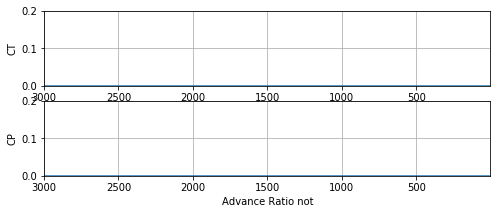

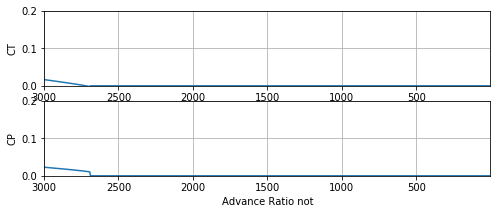

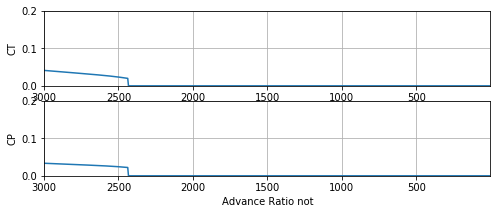

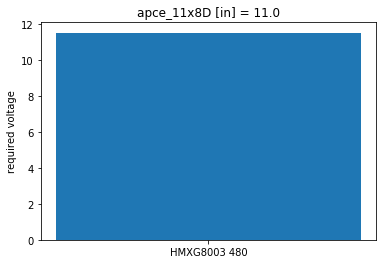

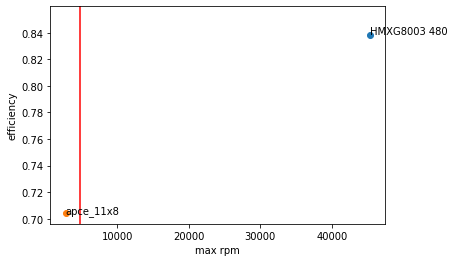

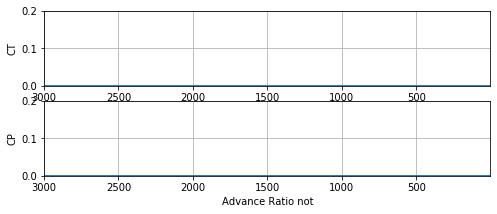

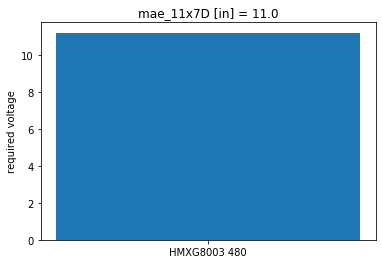

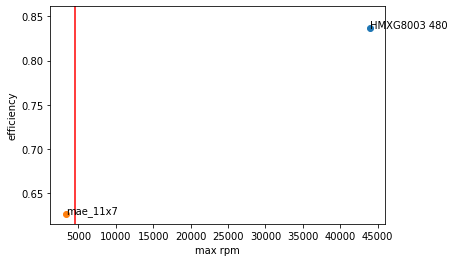

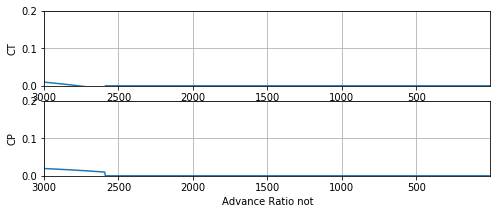

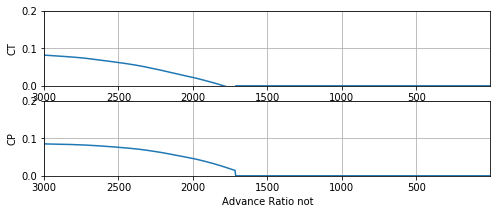

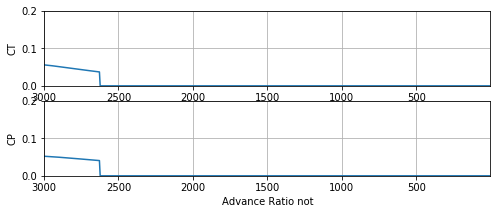

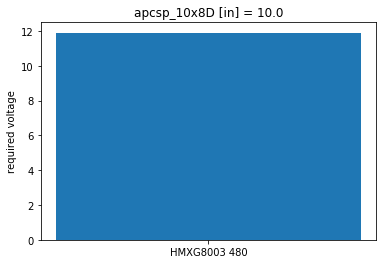

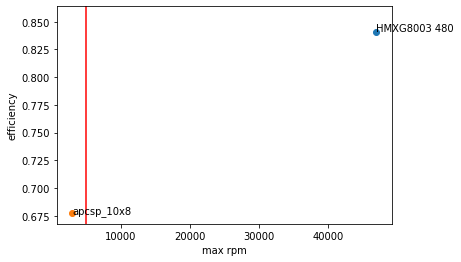

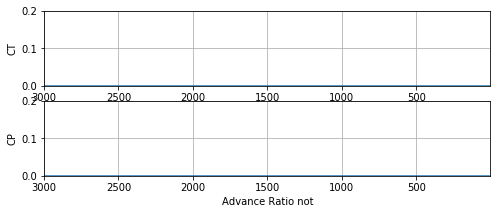

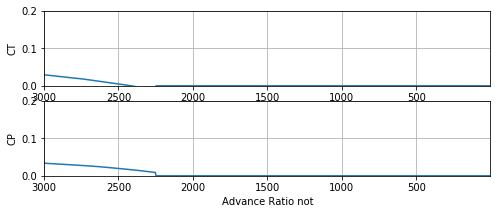

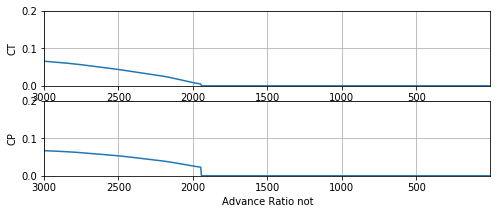

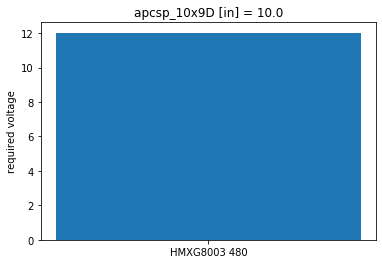

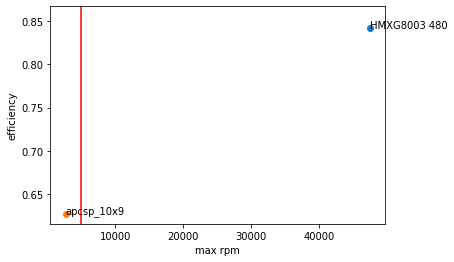

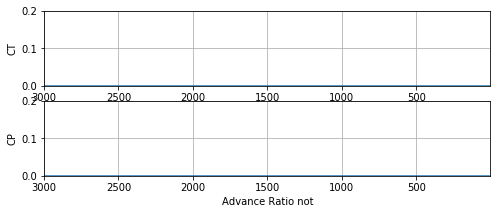

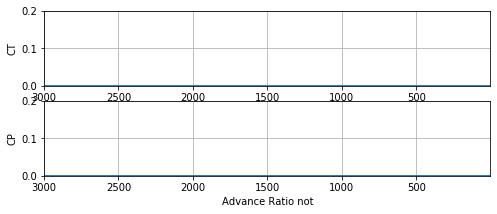

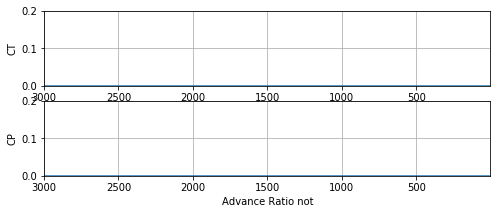

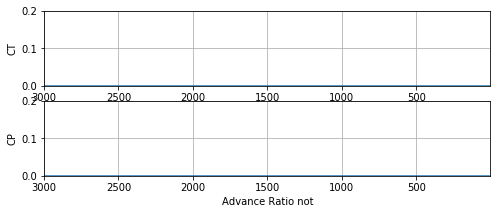

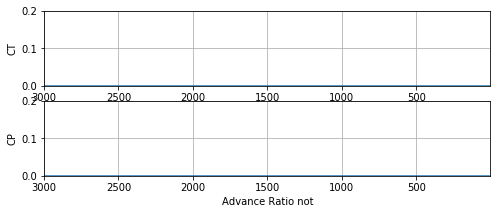

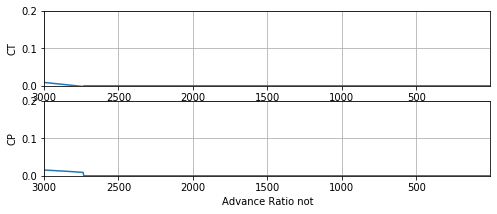

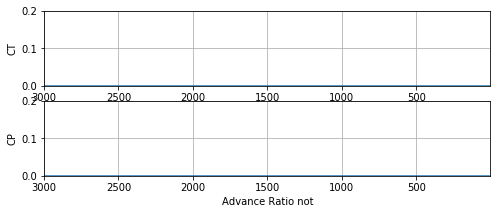

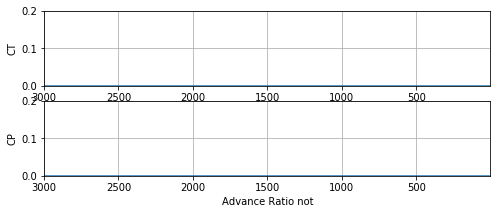

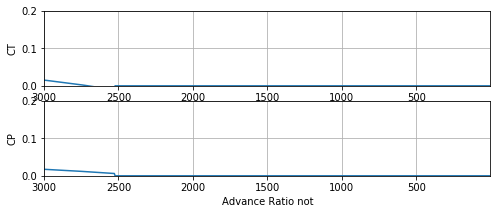

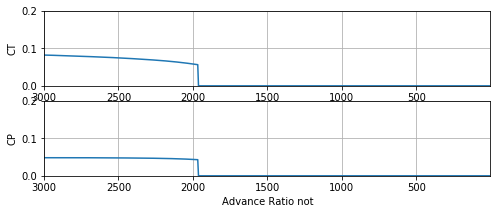

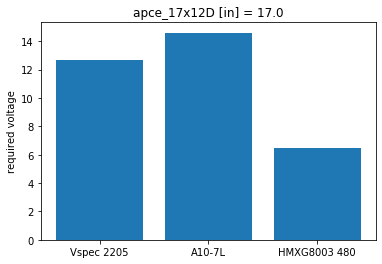

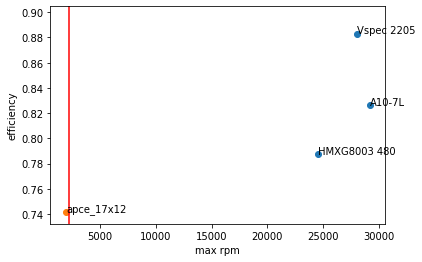

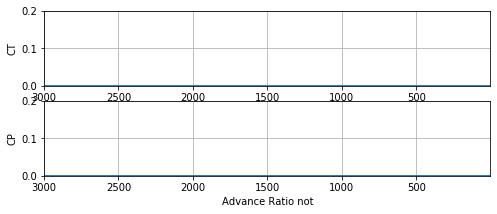

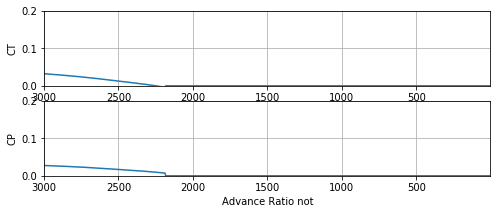

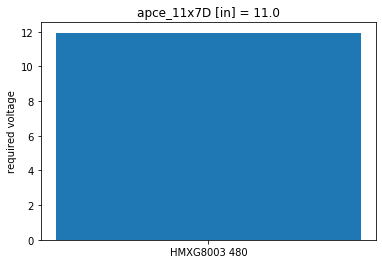

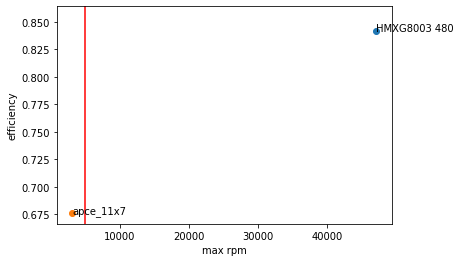

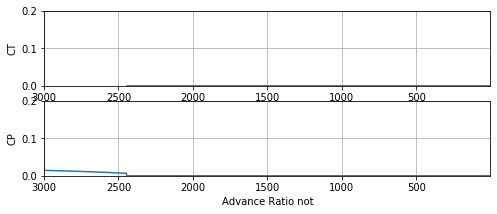

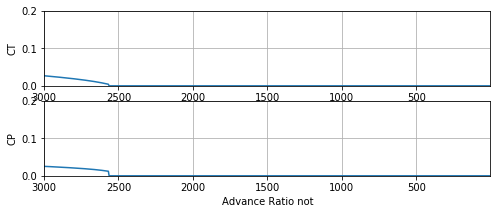

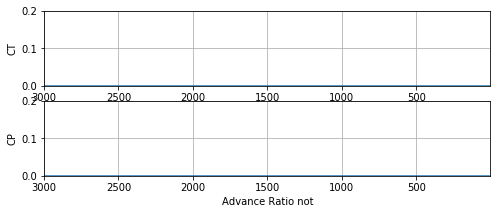

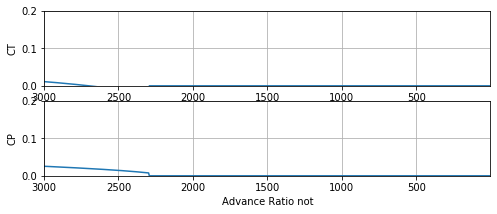

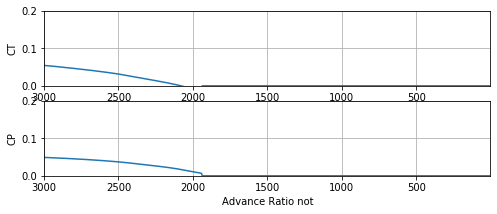

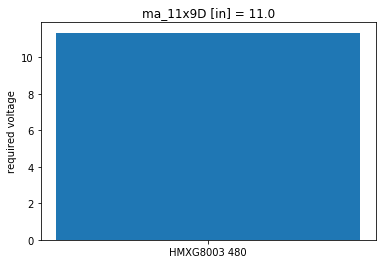

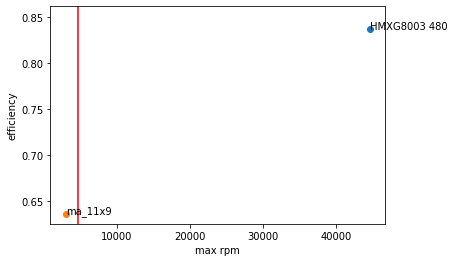

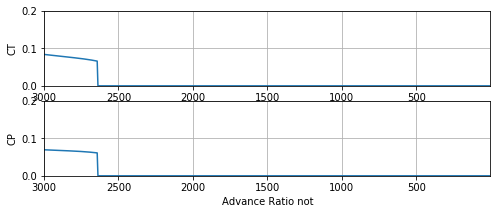

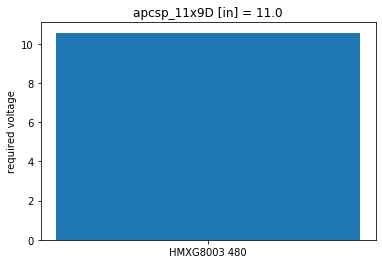

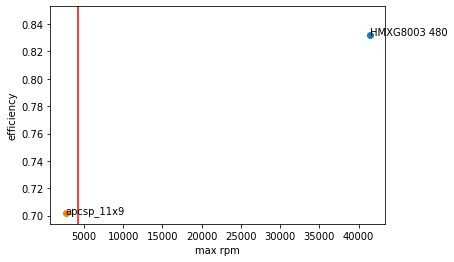

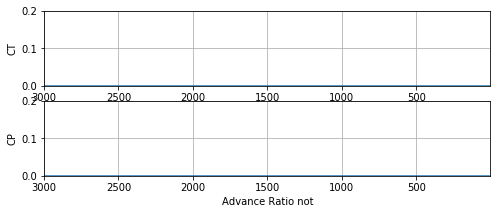

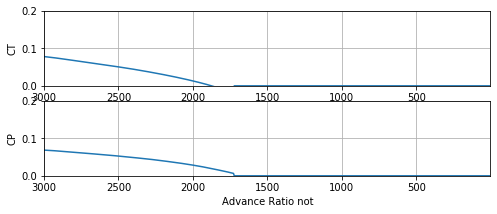

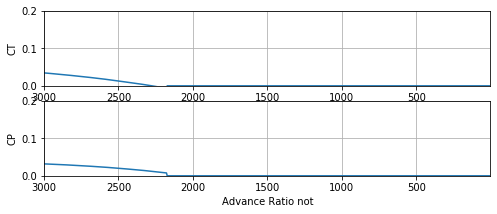

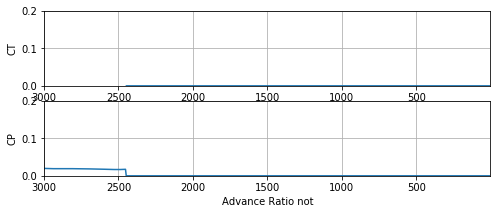

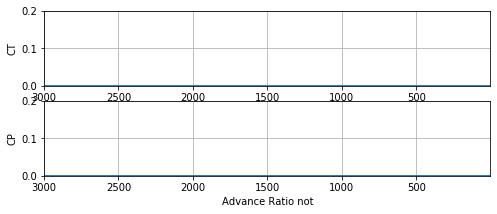

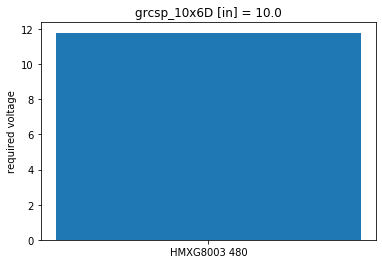

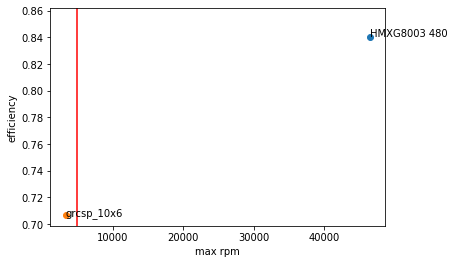

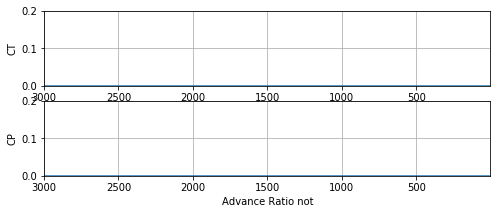

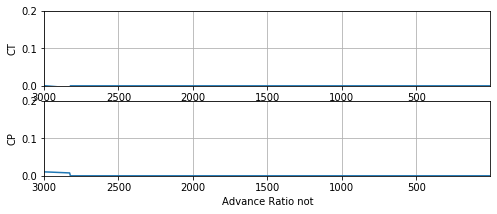

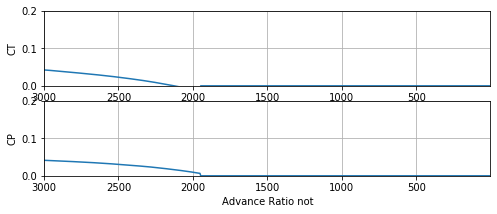

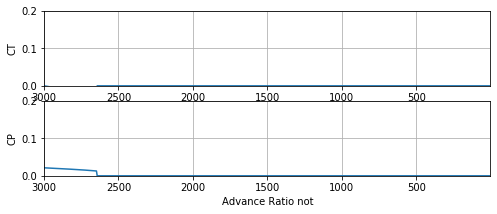

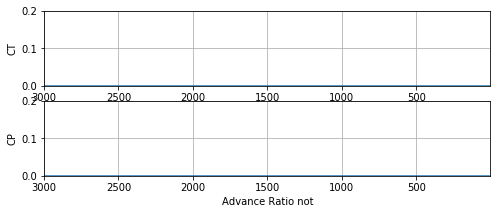

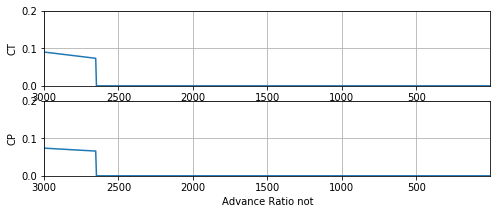

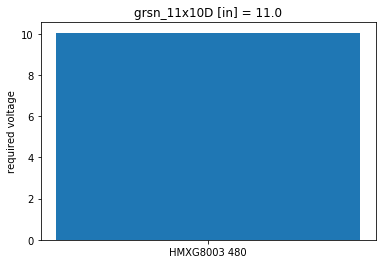

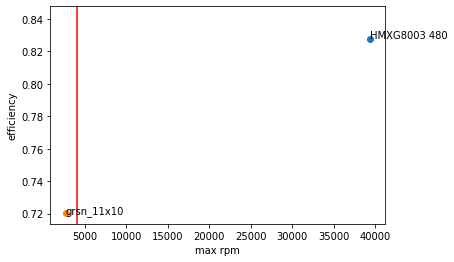

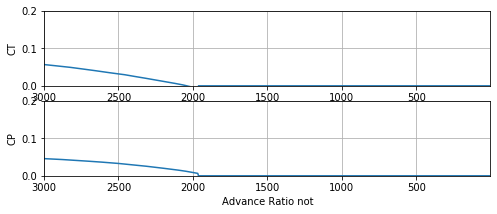

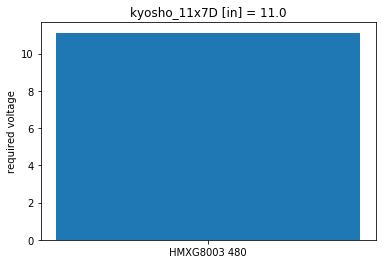

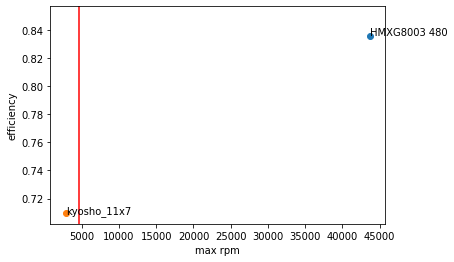

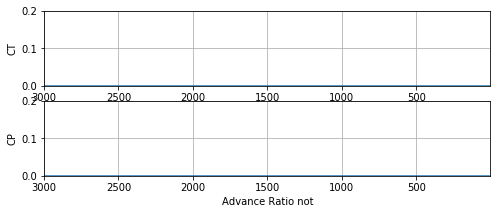

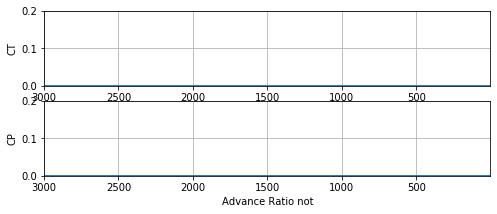

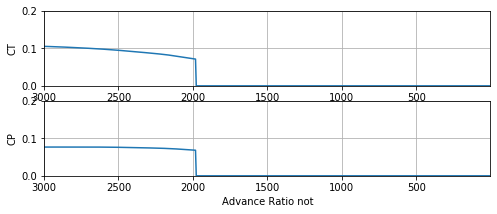

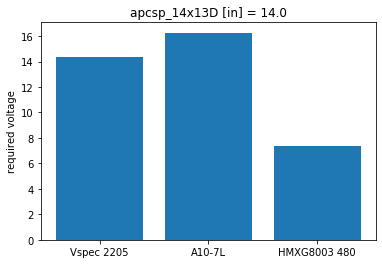

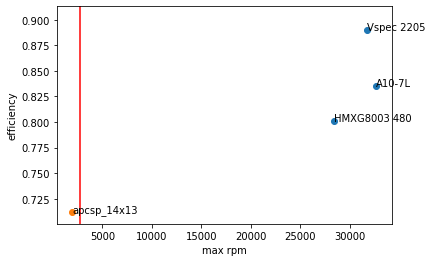

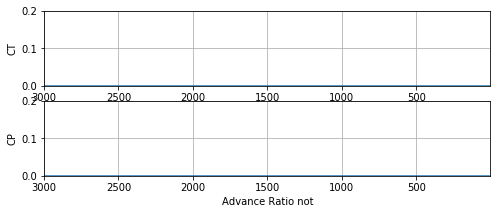

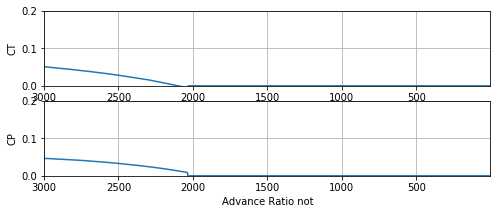

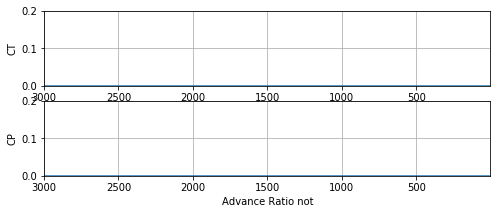

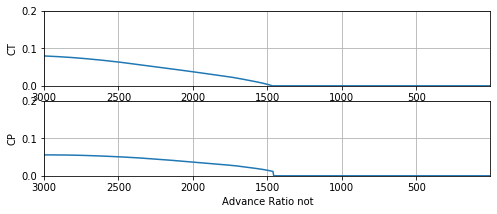

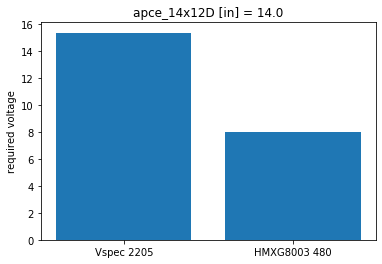

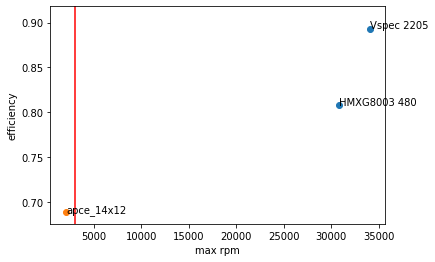

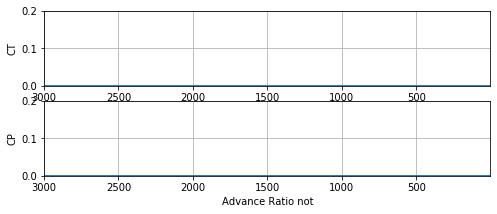

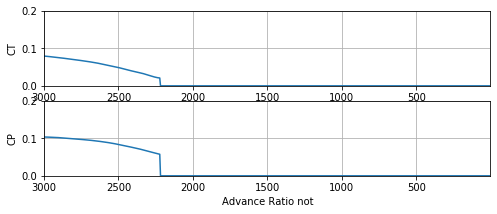

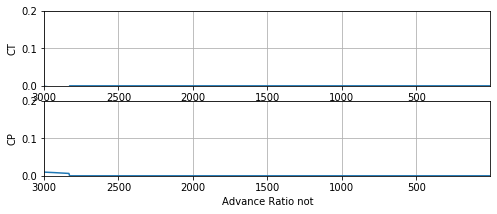

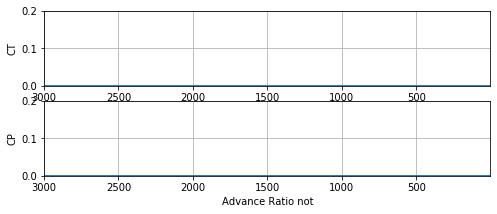

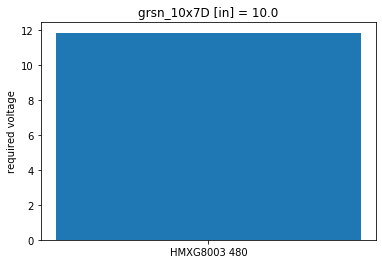

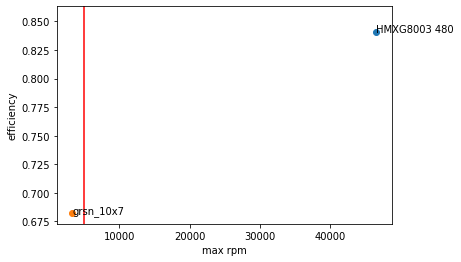

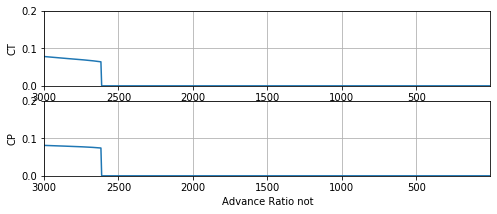

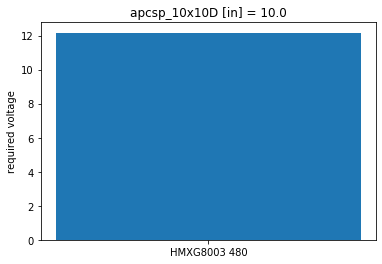

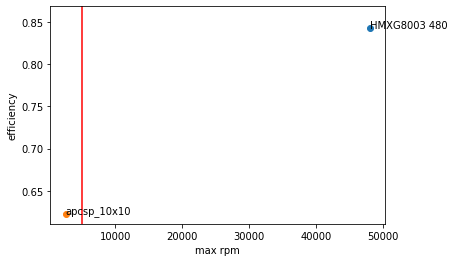

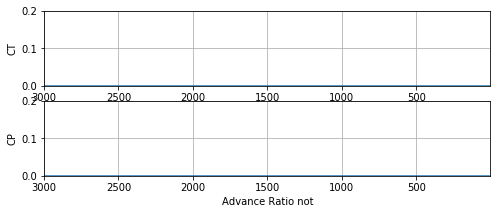

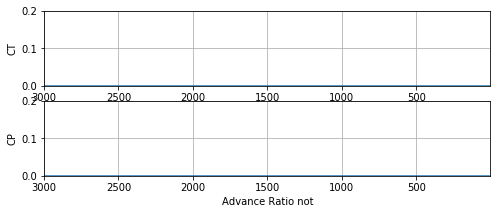

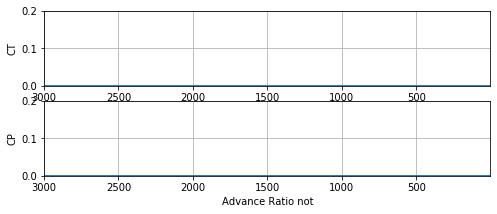

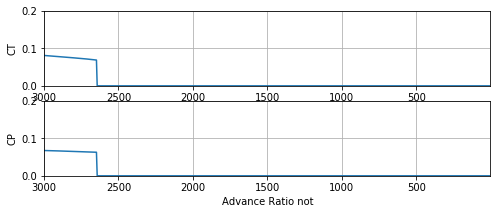

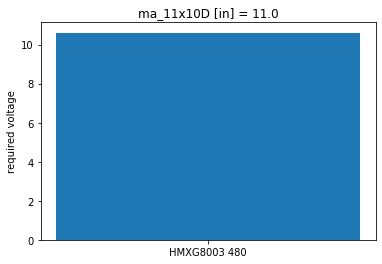

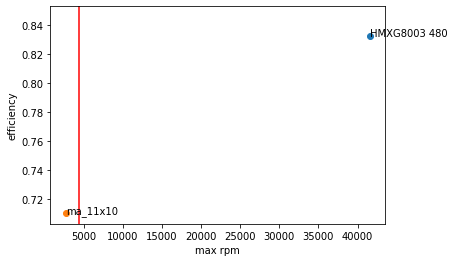

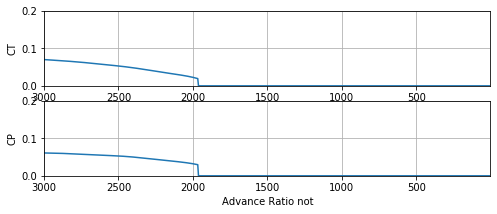

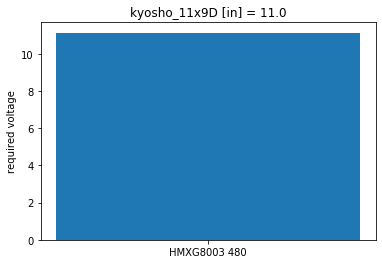

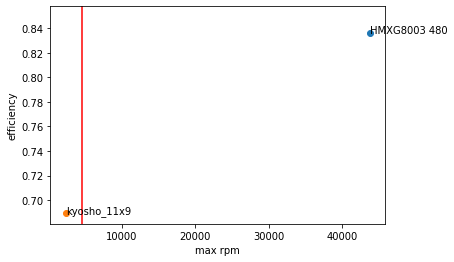

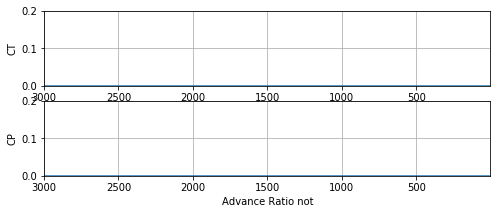

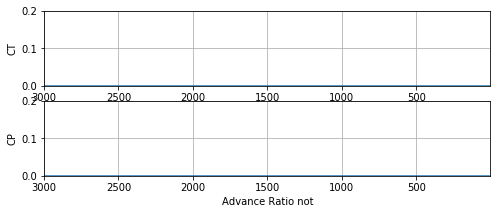

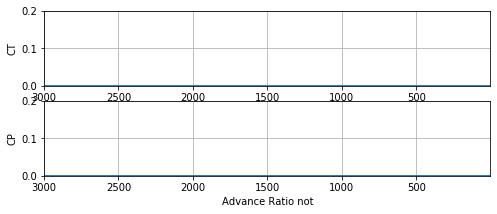

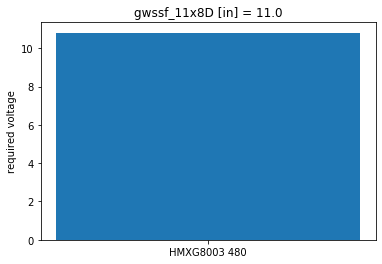

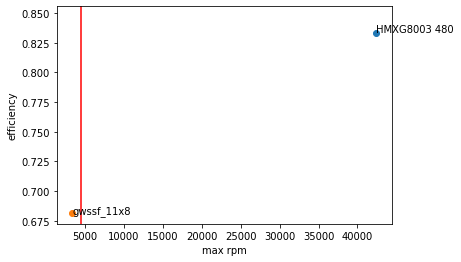

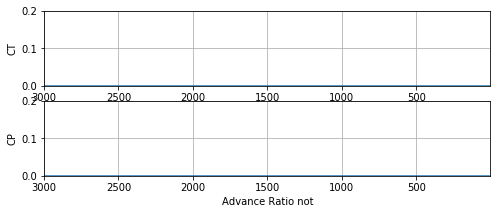

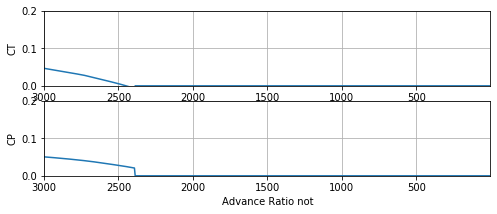

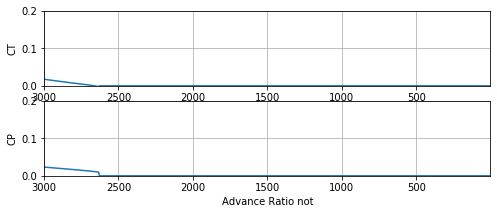

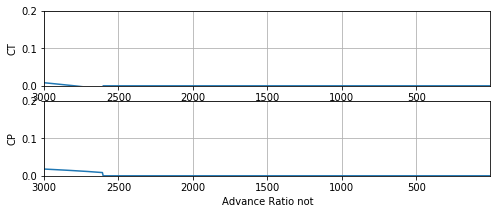

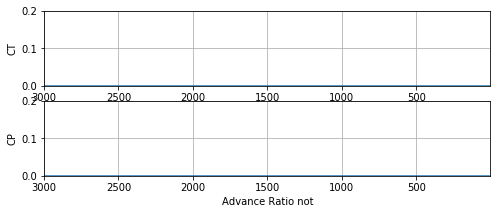

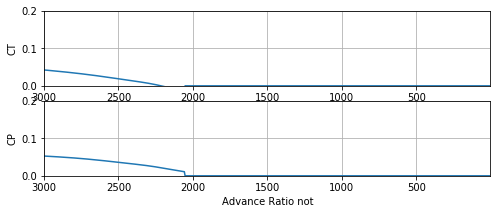

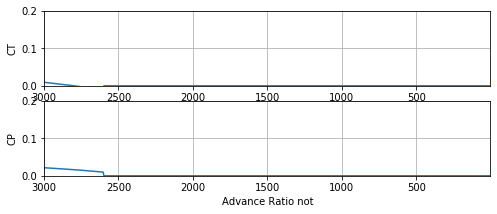

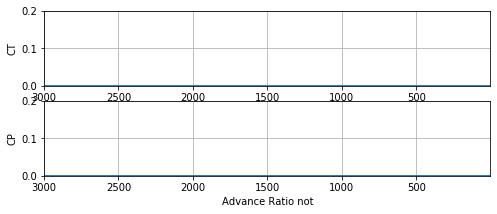

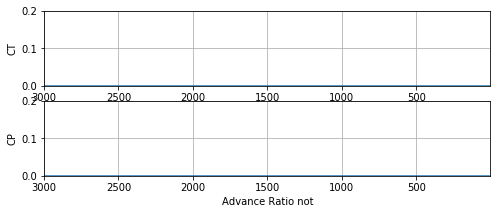

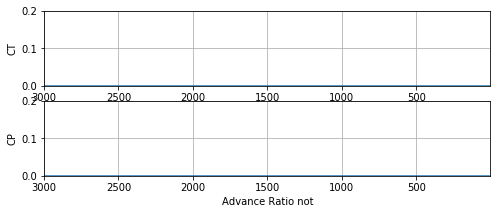

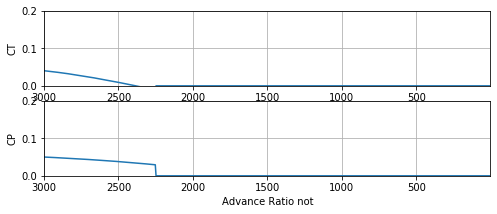

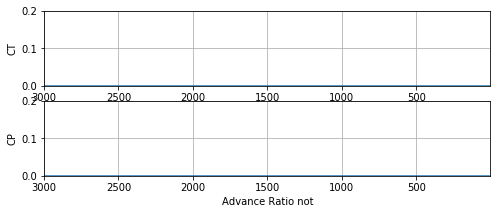

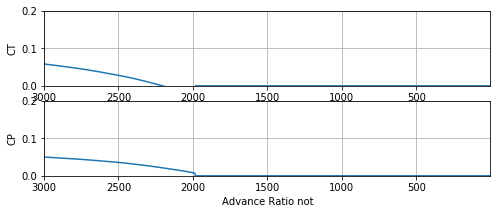

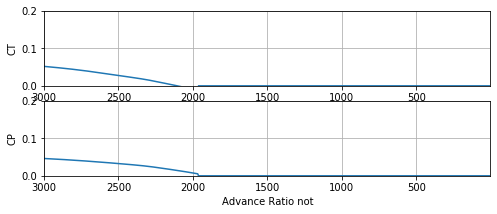

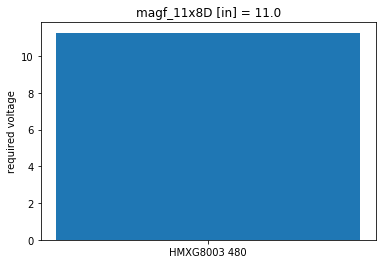

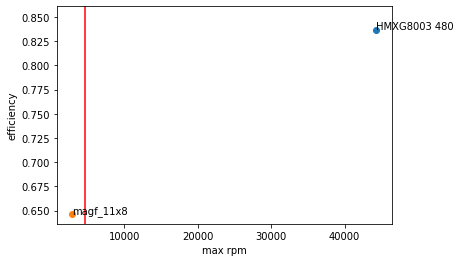

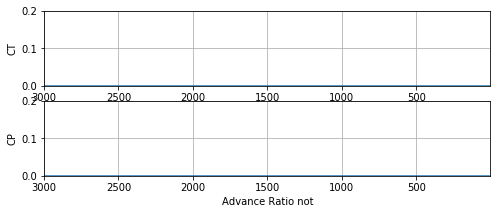

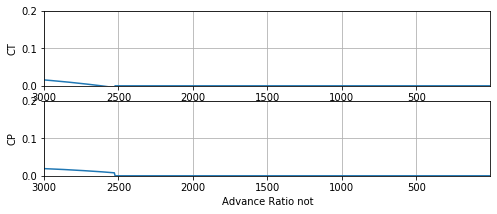

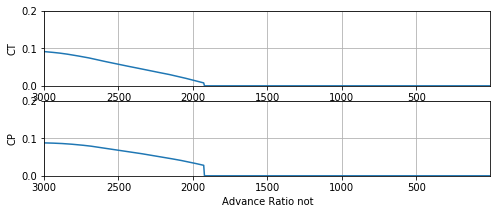

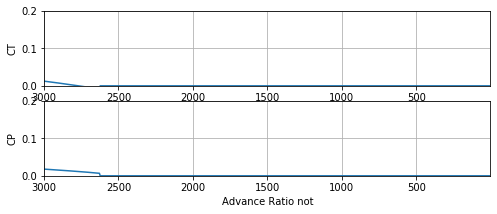

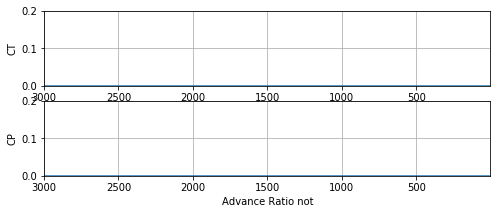

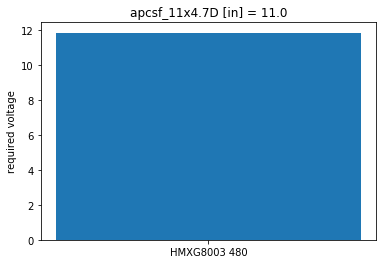

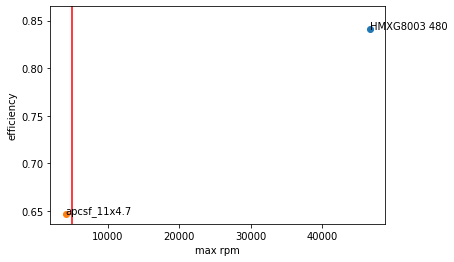

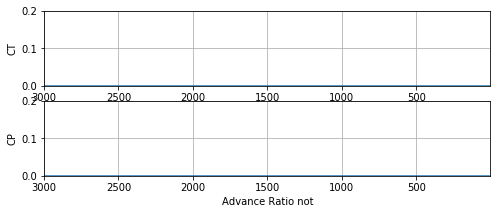

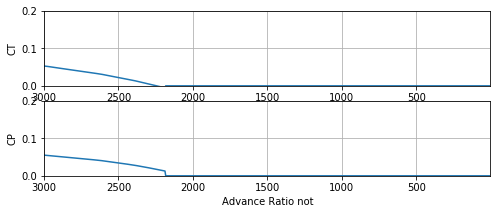

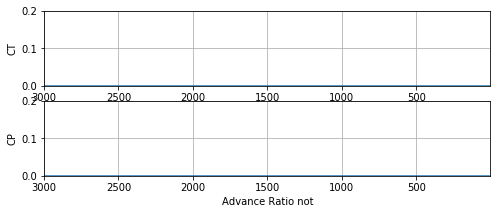

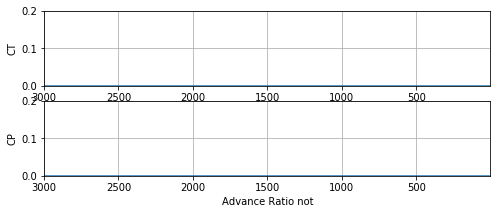

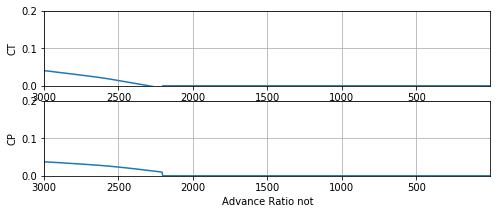

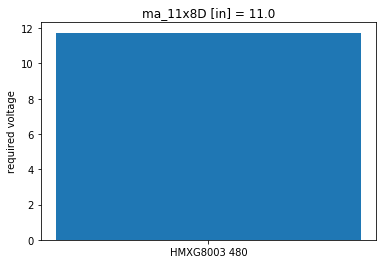

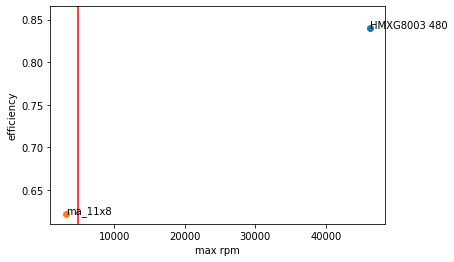

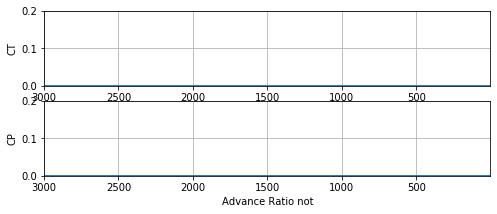

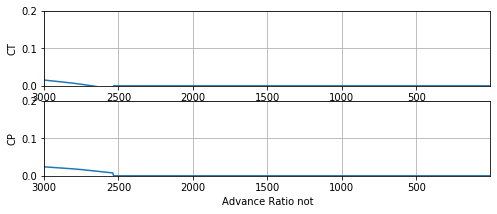

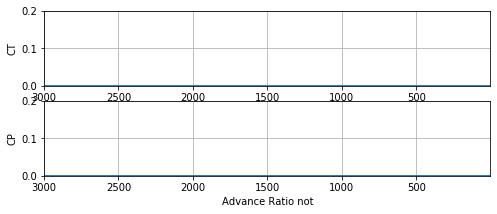

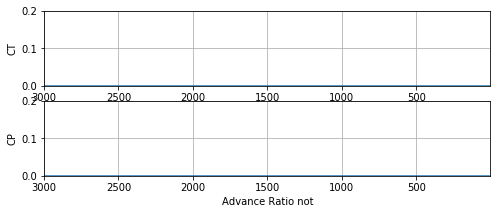

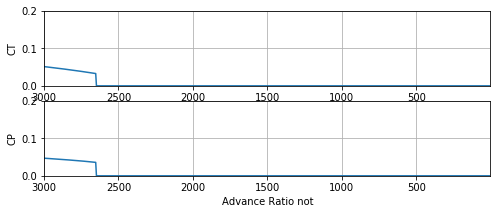

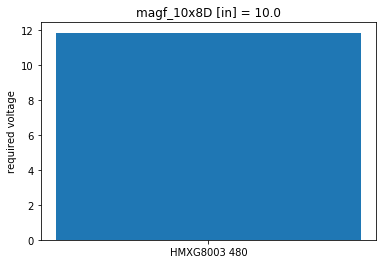

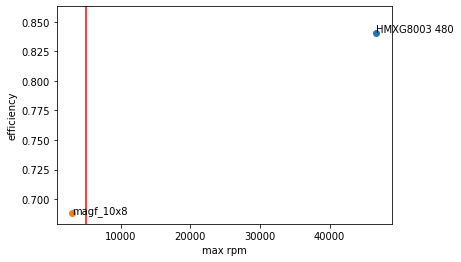

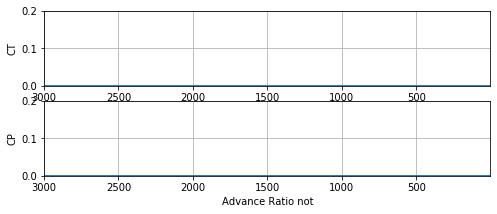

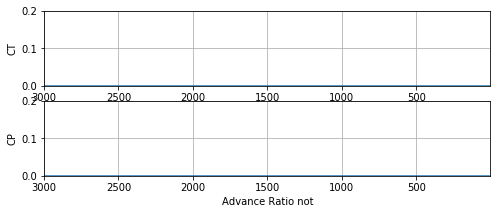

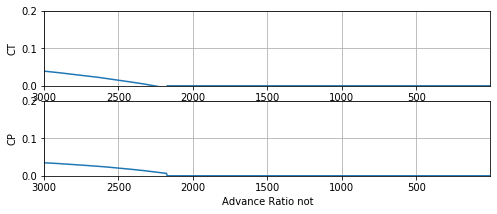

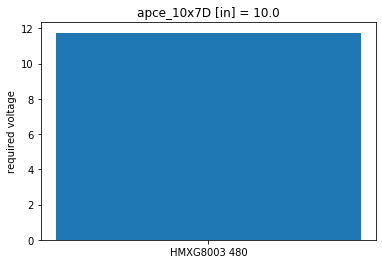

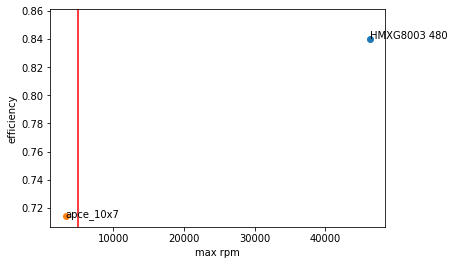

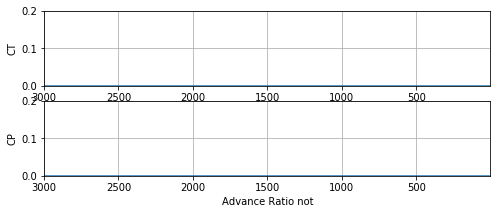

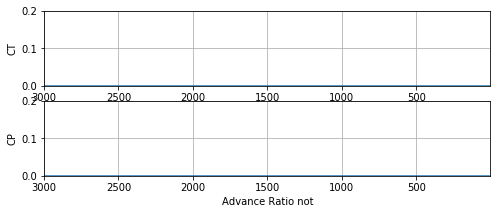

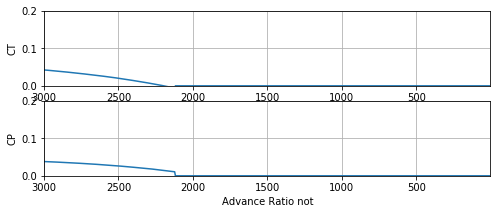

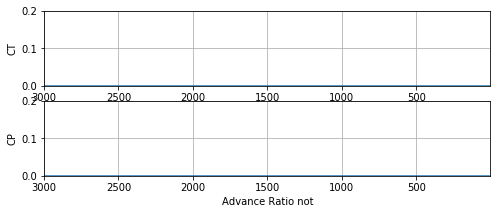

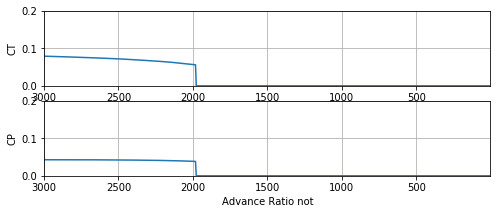

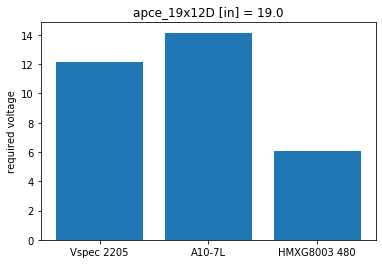

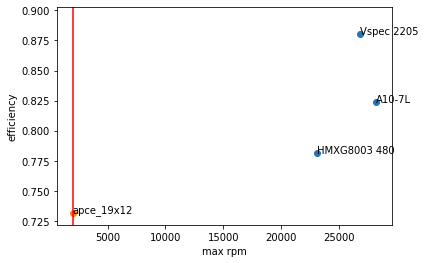

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%run propdata.py
out(8.0, 4, 1, 17)

In [9]:
o = {'1':{'a':0},'2':{'a':0}}
#a = [[s for s in o[m][s]] for m in range(2)]
enumerate(list(o.keys()))